In [1]:
# Import required modules/methods
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path

from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_dir = Path(r'D:\Train')

In [3]:
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [4]:
len(train_filepaths)

1835

In [5]:
train_filepaths[1:5]

[WindowsPath('D:/Train/Alpinia Galanga (Rasna)/AG-S-002.jpg'),
 WindowsPath('D:/Train/Alpinia Galanga (Rasna)/AG-S-003.jpg'),
 WindowsPath('D:/Train/Alpinia Galanga (Rasna)/AG-S-004.jpg'),
 WindowsPath('D:/Train/Alpinia Galanga (Rasna)/AG-S-005.jpg')]

In [6]:
filepath = pd.Series(train_filepaths,name='Filepath').astype(str)

In [7]:
filepath[1]

'D:\\Train\\Alpinia Galanga (Rasna)\\AG-S-002.jpg'

In [8]:
str(train_filepaths[1]).split('\\')

['D:', 'Train', 'Alpinia Galanga (Rasna)', 'AG-S-002.jpg']

In [9]:
str(train_filepaths[1]).split('\\')[-2]

'Alpinia Galanga (Rasna)'

In [10]:
len(filepath)

1835

In [11]:
labels = []
for i in range(len(filepath)):
    
    #list.append(i)

    label =str(train_filepaths[i]).split('\\')[-2]
    labels.append(label)
    
    
    #labels = pd.Series(labels, name='Labels')

In [12]:
labels[1:5]

['Alpinia Galanga (Rasna)',
 'Alpinia Galanga (Rasna)',
 'Alpinia Galanga (Rasna)',
 'Alpinia Galanga (Rasna)']

In [13]:
train_filepaths[1:5]

[WindowsPath('D:/Train/Alpinia Galanga (Rasna)/AG-S-002.jpg'),
 WindowsPath('D:/Train/Alpinia Galanga (Rasna)/AG-S-003.jpg'),
 WindowsPath('D:/Train/Alpinia Galanga (Rasna)/AG-S-004.jpg'),
 WindowsPath('D:/Train/Alpinia Galanga (Rasna)/AG-S-005.jpg')]

In [14]:
filepath = pd.Series(train_filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

In [15]:
df = pd.concat([filepath, labels], axis=1)

In [16]:
df = df.sample(frac=1).reset_index(drop = True)

In [17]:
train_df=df
train_df.head(6)

,Filepath,Label
0,D:\Train\Mentha (Mint)\M-S-083.jpg,Mentha (Mint)
1,D:\Train\Carissa Carandas (Karanda)\CC-S-043.jpg,Carissa Carandas (Karanda)
2,D:\Train\Psidium Guajava (Guava)\PG-S-014.jpg,Psidium Guajava (Guava)
3,D:\Train\Muntingia Calabura (Jamaica Cherry-Ga...,Muntingia Calabura (Jamaica Cherry-Gasagase)
4,D:\Train\Piper Betle (Betel)\PB-S-020.jpg,Piper Betle (Betel)
5,D:\Train\Piper Betle (Betel)\PB-S-047.jpg,Piper Betle (Betel)


In [18]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique().tolist()}')

-- Training set --

Number of pictures: 1835

Number of different labels: 30

Labels: ['Mentha (Mint)', 'Carissa Carandas (Karanda)', 'Psidium Guajava (Guava)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Piper Betle (Betel)', 'Mangifera Indica (Mango)', 'Alpinia Galanga (Rasna)', 'Punica Granatum (Pomegranate)', 'Hibiscus Rosa-sinensis', 'Murraya Koenigii (Curry)', 'Basella Alba (Basale)', 'Nyctanthes Arbor-tristis (Parijata)', 'Artocarpus Heterophyllus (Jackfruit)', 'Citrus Limon (Lemon)', 'Pongamia Pinnata (Indian Beech)', 'Ficus Religiosa (Peepal Tree)', 'Brassica Juncea (Indian Mustard)', 'Ficus Auriculata (Roxburgh fig)', 'Plectranthus Amboinicus (Mexican Mint)', 'Syzygium Jambos (Rose Apple)', 'Azadirachta Indica (Neem)', 'Santalum Album (Sandalwood)', 'Jasminum (Jasmine)', 'Nerium Oleander (Oleander)', 'Amaranthus Viridis (Arive-Dantu)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Moringa Oleifera (Drumstick)', 'Ocimum Tenuiflorum (Tulsi)', 'Trigonella Foenum-graecum (F

In [19]:
# Scale the data - [0,1], validation split - creating objects
train_DataGenerator = ImageDataGenerator(
    rescale=1/255,
)

test_DataGenerator = ImageDataGenerator(
    rescale=1/255,
)

In [20]:
# Split train and test datasets
train_df, test_df = train_test_split(df, 
                                     test_size=0.3, 
                                     shuffle=True, 
                                     random_state=1)

In [21]:
train_images = train_DataGenerator.flow_from_dataframe(
    dataframe=train_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(128, 128),
    class_mode="categorical",
    seed=42,
    subset='training'
)

test_images = test_DataGenerator.flow_from_dataframe(
    dataframe=test_df,
    x_col="Filepath",
    y_col="Label",
    target_size=(128, 128),
    class_mode="categorical"
)

Found 1284 validated image filenames belonging to 30 classes.
Found 551 validated image filenames belonging to 30 classes.


In [22]:
test_images.image_shape, train_images.image_shape

((128, 128, 3), (128, 128, 3))

In [23]:
model = Sequential()

# Add first Conv and pool layers
model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 activation = "relu", 
                 input_shape = (128, 128, 3),
                 name= "Input_Layer"))
model.add(MaxPool2D((2,2), name = "Pooling_1"))

# 2nd Conv and pool layers
model.add(Conv2D(filters = 32, 
                 kernel_size = (3,3), 
                 activation = "relu", 
                 name= "Conv_Layer2"))
model.add(MaxPool2D((2,2), name = "Pooling_2"))
# 3rd Conv and pool layers
model.add(Conv2D(filters = 64, 
                kernel_size = (3,3), 
                activation = "relu", 
                name= "Conv_Layer3"))
model.add(MaxPool2D((2,2), name = "Pooling_3"))
#4th Conv and pool layers
model.add(Conv2D(filters = 64, 
                 kernel_size = (3,3), 
                 activation = "relu", 
                 name= "Conv_Layer4"))
model.add(MaxPool2D((2,2), name = "Pooling_4"))


# Flatten the output of 2nd conv layer
model.add(Flatten())

# Add FC layers
model.add(Dense(128, activation="relu", name="Dense_1")) # FC1
model.add(Dense(64, activation="relu", name="Dense_2")) # FC2
model.add(Dense(30, activation="softmax", name="Output_Layer")) # FC3 - Output FC layer

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Conv2D)        (None, 126, 126, 32)      896       
                                                                 
 Pooling_1 (MaxPooling2D)    (None, 63, 63, 32)        0         
                                                                 
 Conv_Layer2 (Conv2D)        (None, 61, 61, 32)        9248      
                                                                 
 Pooling_2 (MaxPooling2D)    (None, 30, 30, 32)        0         
                                                                 
 Conv_Layer3 (Conv2D)        (None, 28, 28, 64)        18496     
                                                                 
 Pooling_3 (MaxPooling2D)    (None, 14, 14, 64)        0         
                                                                 
 Conv_Layer4 (Conv2D)        (None, 12, 12, 64)        3

In [25]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics="accuracy"
)

In [26]:
history = model.fit(
    train_images,
    epochs = 10
)

Epoch 1/10
41/41 [==============================] - 117s 3s/step - loss: 3.3353 - accuracy: 0.0623
Epoch 2/10
41/41 [==============================] - 102s 2s/step - loss: 2.4278 - accuracy: 0.2843
Epoch 3/10
41/41 [==============================] - 89s 2s/step - loss: 1.6140 - accuracy: 0.5055
Epoch 4/10
41/41 [==============================] - 86s 2s/step - loss: 1.1406 - accuracy: 0.6417
Epoch 5/10
41/41 [==============================] - 92s 2s/step - loss: 0.8088 - accuracy: 0.7523
Epoch 6/10
41/41 [==============================] - 84s 2s/step - loss: 0.6380 - accuracy: 0.8022
Epoch 7/10
41/41 [==============================] - 78s 2s/step - loss: 0.5239 - accuracy: 0.8364
Epoch 8/10
41/41 [==============================] - 79s 2s/step - loss: 0.4554 - accuracy: 0.8427
Epoch 9/10
41/41 [==============================] - 76s 2s/step - loss: 0.3977 - accuracy: 0.8653
Epoch 10/10
41/41 [==============================] - 78s 2s/step - loss: 0.2583 - accuracy: 0.9104


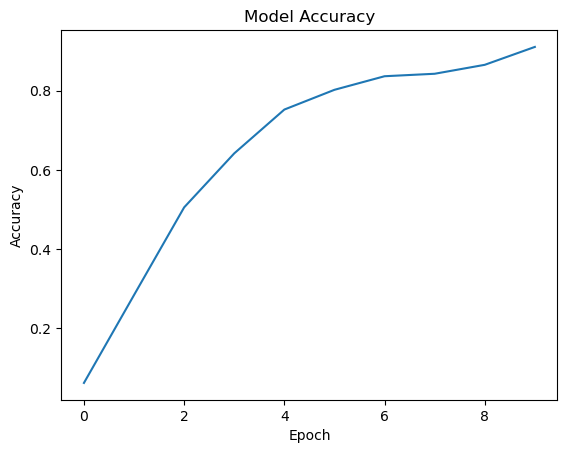

In [27]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [28]:
model.evaluate(test_images)

18/18 [==============================] - 35s 2s/step - loss: 0.7448 - accuracy: 0.7750


[0.7448170781135559, 0.774954617023468]

In [29]:
prediction_pobabilities = model.predict(test_images)

test_predictions = [np.argmax(prob) for prob in prediction_pobabilities]
test_predictions[1:5]

18/18 [==============================] - 25s 1s/step


[1, 28, 13, 6]

In [32]:
cm = confusion_matrix(test_images.labels, test_predictions)
cm

array([[0, 4, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0],
       [1, 3, 1, 1, 4, 0, 0, 2, 2, 1, 1, 1, 0, 5, 1, 2, 1, 1, 1, 2, 1, 1,
        1, 0, 0, 1, 1, 2, 5, 0],
       [0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 1],
       [1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 3, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0],
       [2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 2, 1, 0],
       [0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0],
       [0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 3, 0,
        1, 0, 0, 0, 0, 1, 3, 0],
       [0, 2, 0, 3, 1, 0, 1, 0, 3, 1, 2, 0, 3, 0, 1, 0, 0, 1, 1, 2, 1, 1,
        2, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 0, 1, 2,

In [33]:
# Print classification report - important for evaluation of the model
print(classification_report(test_images.labels, test_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.08      0.07      0.08        42
           2       0.05      0.06      0.06        17
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        12
           6       0.05      0.05      0.05        21
           7       0.00      0.00      0.00        27
           8       0.05      0.07      0.06        14
           9       0.09      0.09      0.09        22
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        20
          13       0.03      0.04      0.04        26
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        20
          16       0.08      0.04      0.06        23
          17       0.06    

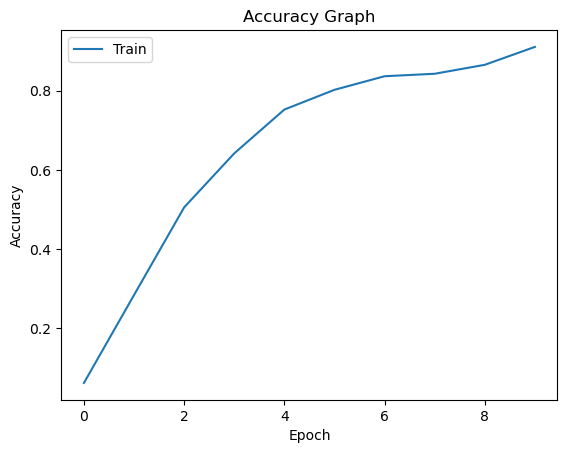

In [34]:


plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

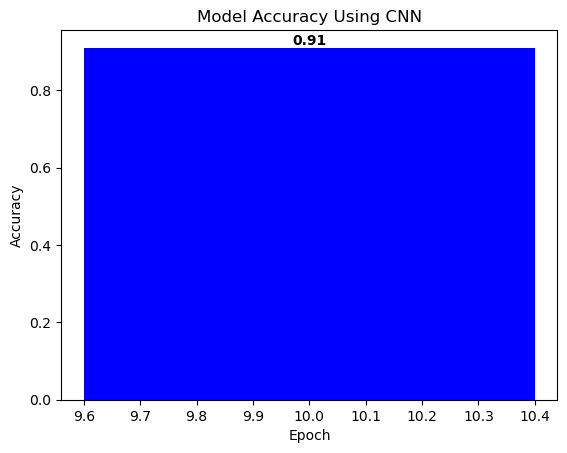

In [41]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and stored the history variable.

train_accuracy = history.history['accuracy']
final_accuracy = train_accuracy[-1]  # Getting the final accuracy value
epochs = range(1, len(train_accuracy) + 1)

plt.bar(epochs[-1], final_accuracy, color='blue')  # Displaying only the last epoch as a bar
plt.text(epochs[-1], final_accuracy, f'{final_accuracy:.2f}', ha='center', va='bottom', color='black', fontweight='bold')
plt.title('Model Accuracy Using CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
